In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100



In [ ]:
RUN_PATH = "./stats/run2"

with open(f"{RUN_PATH}/stats.json", "r") as f:
    stats = json.load(f)

In [ ]:
def load_stats(stats, complete: bool = False) -> pd.DataFrame | tuple[pd.DataFrame, pd.DataFrame]:

    df1, df2 = {}, {}

    for key, value in stats.items():
        if isinstance(value, list):
            print(f"{key}: Length = {len(value)}")
            if not df1 or len(df1[next(iter(df1))]) == len(value):
                df1[key] = value
            elif len(df1[next(iter(df1))]) != len(value):
                df2[key] = value  

        else:
            print(f"{key}: Type = {type(value)}")

    if complete:
        if df1 and df2:
            return pd.DataFrame(df1), pd.DataFrame(df2)
        raise ValueError("error")
    else:
        if df1 and not df2:
            return pd.DataFrame(df1)
        elif df2 and not df1:
            return pd.DataFrame(df2)
        return pd.DataFrame(df1) if len(df1[next(iter(df1))]) < len(df2[next(iter(df2))]) else pd.DataFrame(df2)

    

    

In [21]:
def plot(df:pd.DataFrame, col = None, x_label="", title=""):
    if col is None:
        return
    title = title if title != "" else col if x_label == "" else f"{col} over {x_label}"
    plt.figure(figsize=(10, 6))
    plt.plot(df[col], linewidth=2)
    plt.xlabel(xlabel=x_label, fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    


In [18]:
df_run2 = load_stats(stats=json.load(open("stats/run2/stats.json", "r")))
df_run3 = load_stats(stats=json.load(open("stats/run3/stats.json", "r")))

Scores: Length = 14673
AvgScores: Length = 14673
EpsCheckpoint: Length = 14673
Losses: Length = 9999918
AvgLosses: Length = 14673
Q_Values: Length = 9999918
Episode_Lengths: Length = 14673
Max_Q: Length = 9999918
Min_Q: Length = 9999918
Score_Per_Step: Length = 14673
Replay_Mem_Usage: Length = 14673
Learning_Steps: Type = <class 'int'>
Total_Frames: Type = <class 'int'>
dict_keys(['Scores', 'AvgScores', 'EpsCheckpoint', 'AvgLosses', 'Episode_Lengths', 'Score_Per_Step', 'Replay_Mem_Usage']) [14673, 14673, 14673, 14673, 14673, 14673, 14673]
Scores: Length = 12651
AvgScores: Length = 12651
EpsCheckpoint: Length = 12651
Losses: Length = 10000018
AvgLosses: Length = 12651
Q_Values: Length = 10000018
Episode_Lengths: Length = 12651
Max_Q: Length = 10000018
Min_Q: Length = 10000018
Score_Per_Step: Length = 12651
Replay_Mem_Usage: Length = 12651
Learning_Steps: Type = <class 'int'>
Total_Frames: Type = <class 'int'>
dict_keys(['Scores', 'AvgScores', 'EpsCheckpoint', 'AvgLosses', 'Episode_Lengt

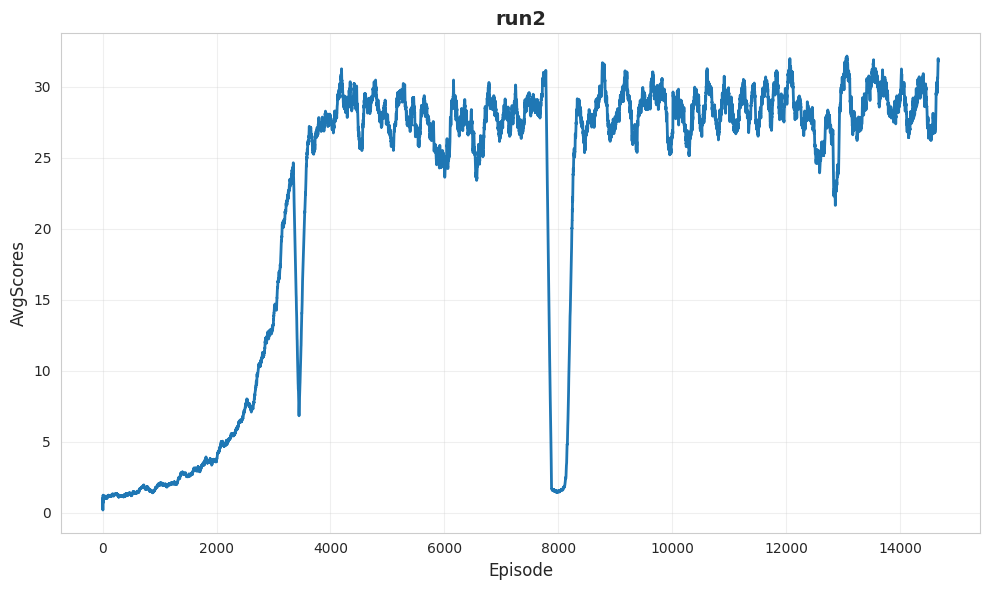

In [23]:
plot(df_run2, col="AvgScores", x_label="Episode", title="run2")


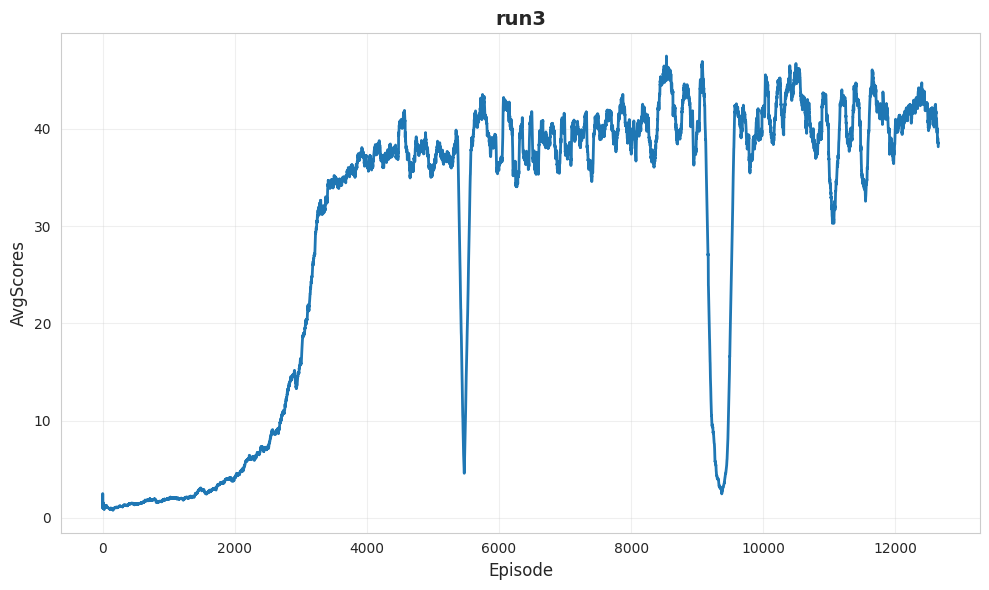

In [25]:
plot(df_run3, col="AvgScores", x_label="Episode", title="run3")

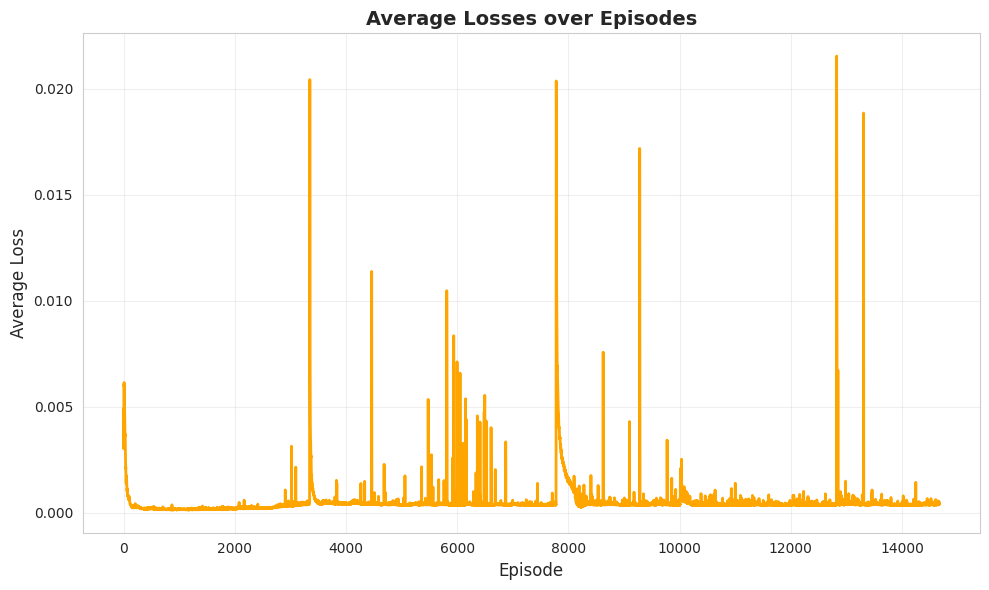

In [6]:
# Plot Average Losses
plt.figure(figsize=(10, 6))
plt.plot(stats['AvgLosses'][1:], linewidth=2, color='orange')
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Average Loss', fontsize=12)
plt.title('Average Losses over Episodes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Comprehensive DQN Training Analysis

Below are detailed visualizations of all key metrics from your DQN training session.

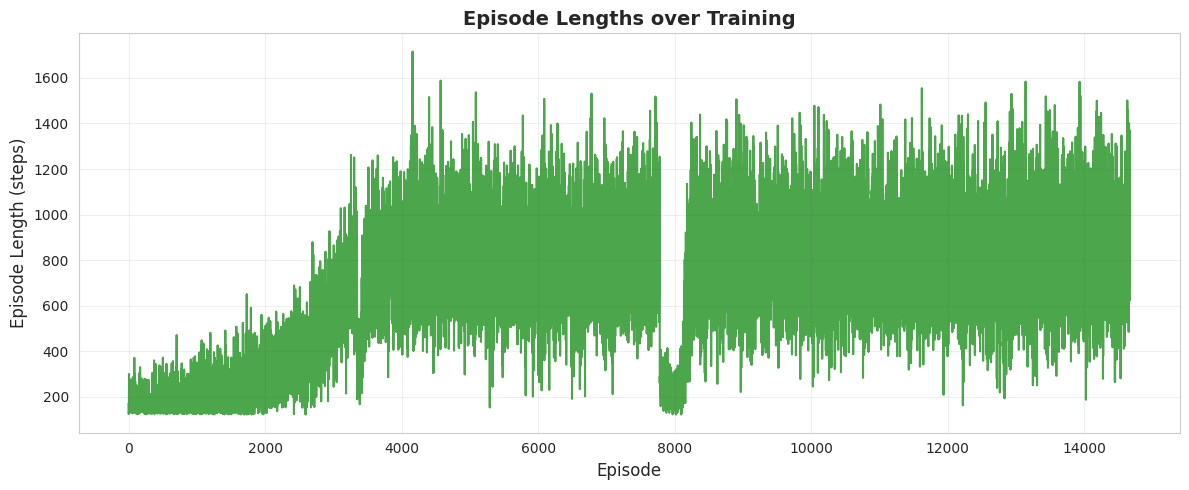

In [7]:
# Episode Lengths over Time
plt.figure(figsize=(12, 5))
plt.plot(stats['Episode_Lengths'], linewidth=1.5, color='green', alpha=0.7)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Episode Length (steps)', fontsize=12)
plt.title('Episode Lengths over Training', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

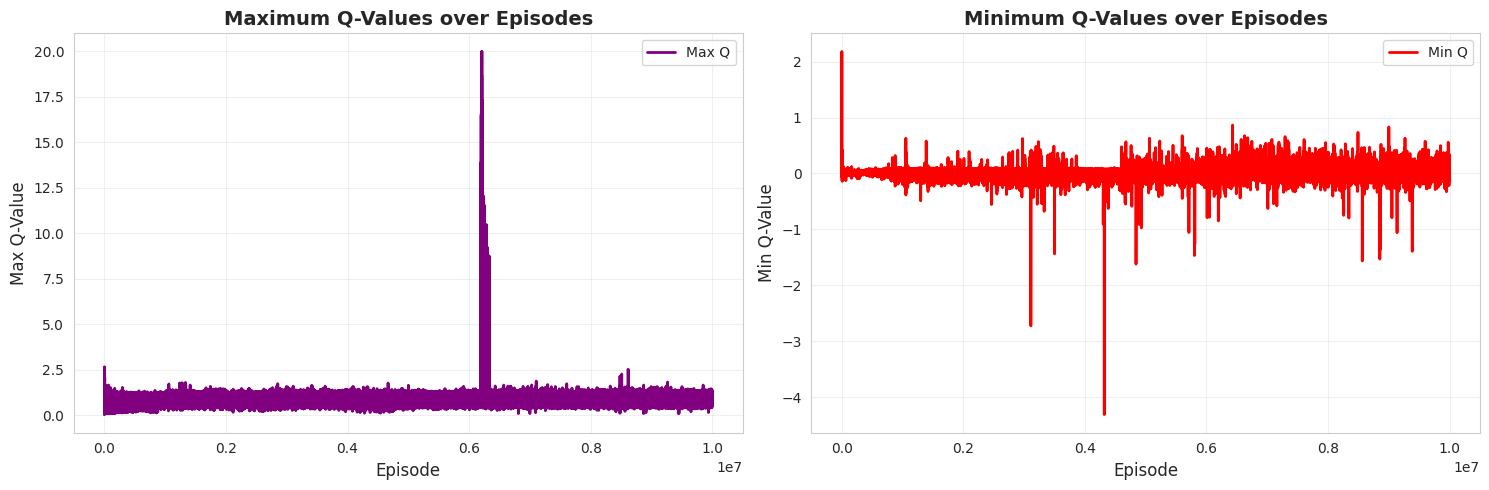

In [8]:
# Q-Values Evolution (Max and Min)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Max Q-Values
ax1.plot(stats['Max_Q'], linewidth=2, color='purple', label='Max Q')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Max Q-Value', fontsize=12)
ax1.set_title('Maximum Q-Values over Episodes', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Min Q-Values
ax2.plot(stats['Min_Q'], linewidth=2, color='red', label='Min Q')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Min Q-Value', fontsize=12)
ax2.set_title('Minimum Q-Values over Episodes', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

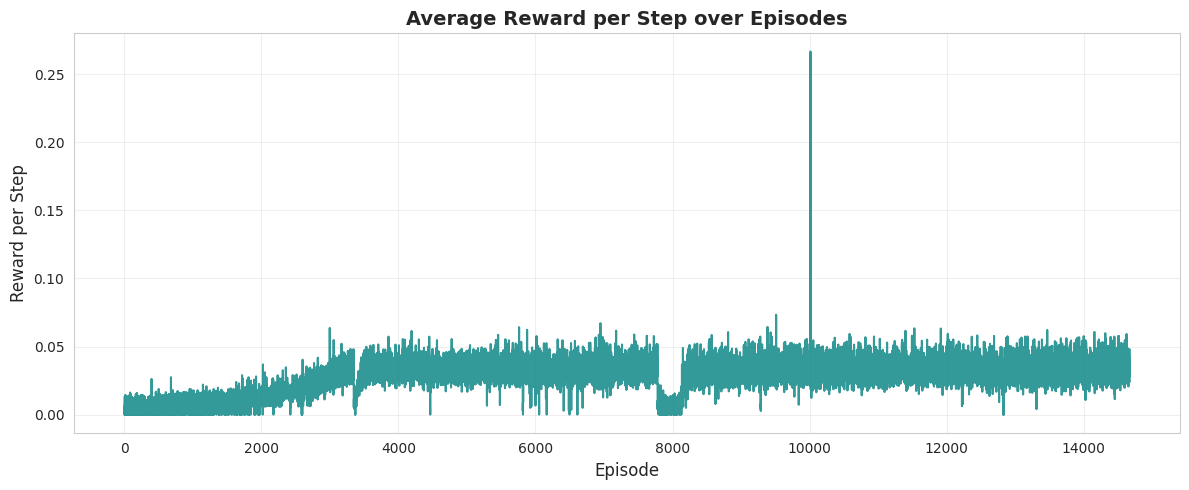

In [9]:
# Reward Per Step Evolution
plt.figure(figsize=(12, 5))
plt.plot(stats['Score_Per_Step'], linewidth=1.5, color='teal', alpha=0.8)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Reward per Step', fontsize=12)
plt.title('Average Reward per Step over Episodes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

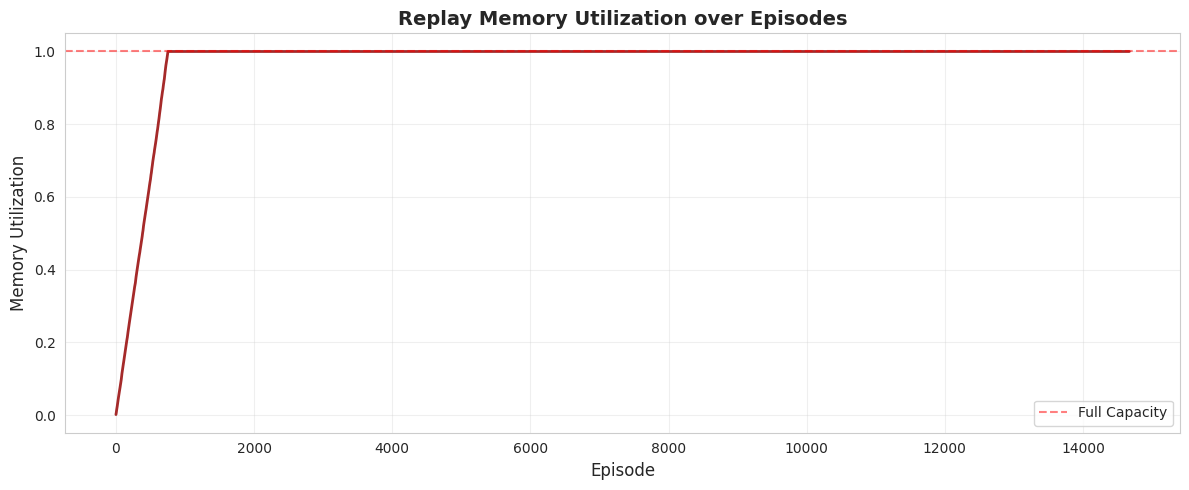

In [12]:
# Memory Utilization
plt.figure(figsize=(12, 5))
plt.plot(stats['Replay_Mem_Usage'], linewidth=2, color='brown')
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Memory Utilization', fontsize=12)
plt.title('Replay Memory Utilization over Episodes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Full Capacity')
plt.legend()
plt.tight_layout()
plt.show()

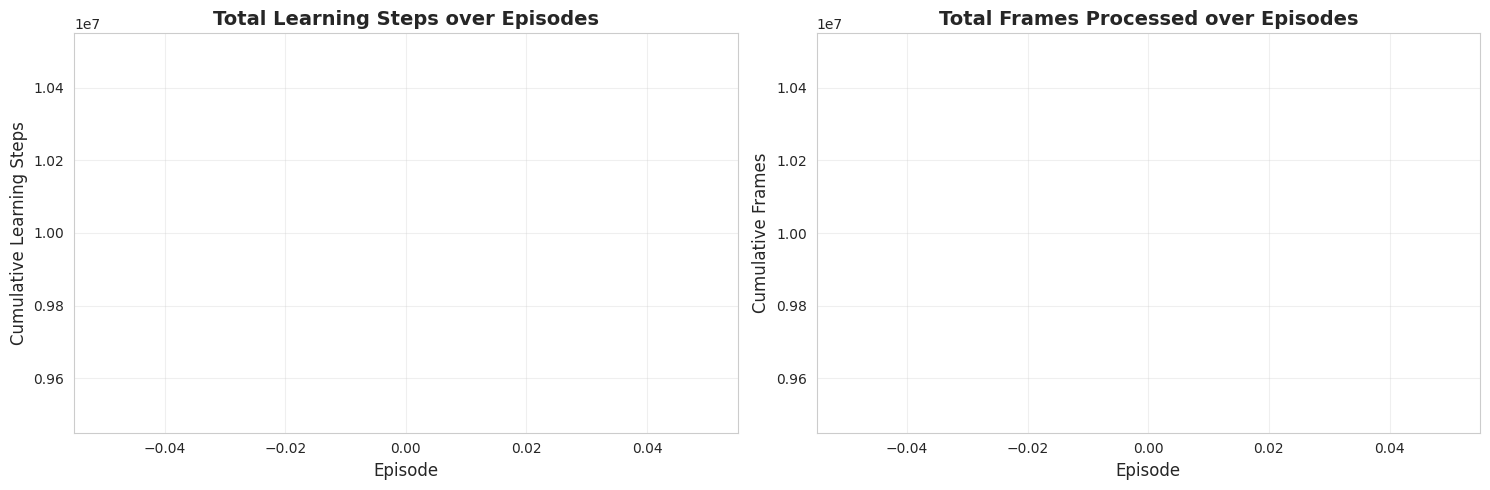

In [14]:
# Learning Steps and Total Frames
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Learning Steps
ax1.plot(stats['Learning_Steps'], linewidth=2, color='navy')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Cumulative Learning Steps', fontsize=12)
ax1.set_title('Total Learning Steps over Episodes', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Total Frames
ax2.plot(stats['Total_Frames'], linewidth=2, color='darkgreen')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Cumulative Frames', fontsize=12)
ax2.set_title('Total Frames Processed over Episodes', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Distribution Analysis using Seaborn
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Distribution of Returns
sns.histplot(stats['Scores'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Episode Returns', fontweight='bold')
axes[0, 0].set_xlabel('Returns')

# Distribution of Losses
sns.histplot(stats['Losses'], kde=True, ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Distribution of Losses', fontweight='bold')
axes[0, 1].set_xlabel('Loss')

# Distribution of Episode Lengths
sns.histplot(stats['Episode_Lengths'], kde=True, ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Distribution of Episode Lengths', fontweight='bold')
axes[0, 2].set_xlabel('Steps')

# Distribution of Reward per Step
sns.histplot(stats['Score_Per_Step'], kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Distribution of Reward per Step', fontweight='bold')
axes[1, 0].set_xlabel('Reward/Step')

# Box plot for Returns
sns.boxplot(y=stats['Scores'], ax=axes[1, 1], color='lightblue')
axes[1, 1].set_title('Returns Boxplot (Outlier Detection)', fontweight='bold')
axes[1, 1].set_ylabel('Returns')

# Violin plot for Losses
sns.violinplot(y=stats['Losses'], ax=axes[1, 2], color='lightsalmon')
axes[1, 2].set_title('Losses Violin Plot', fontweight='bold')
axes[1, 2].set_ylabel('Loss')

plt.tight_layout()
plt.show()

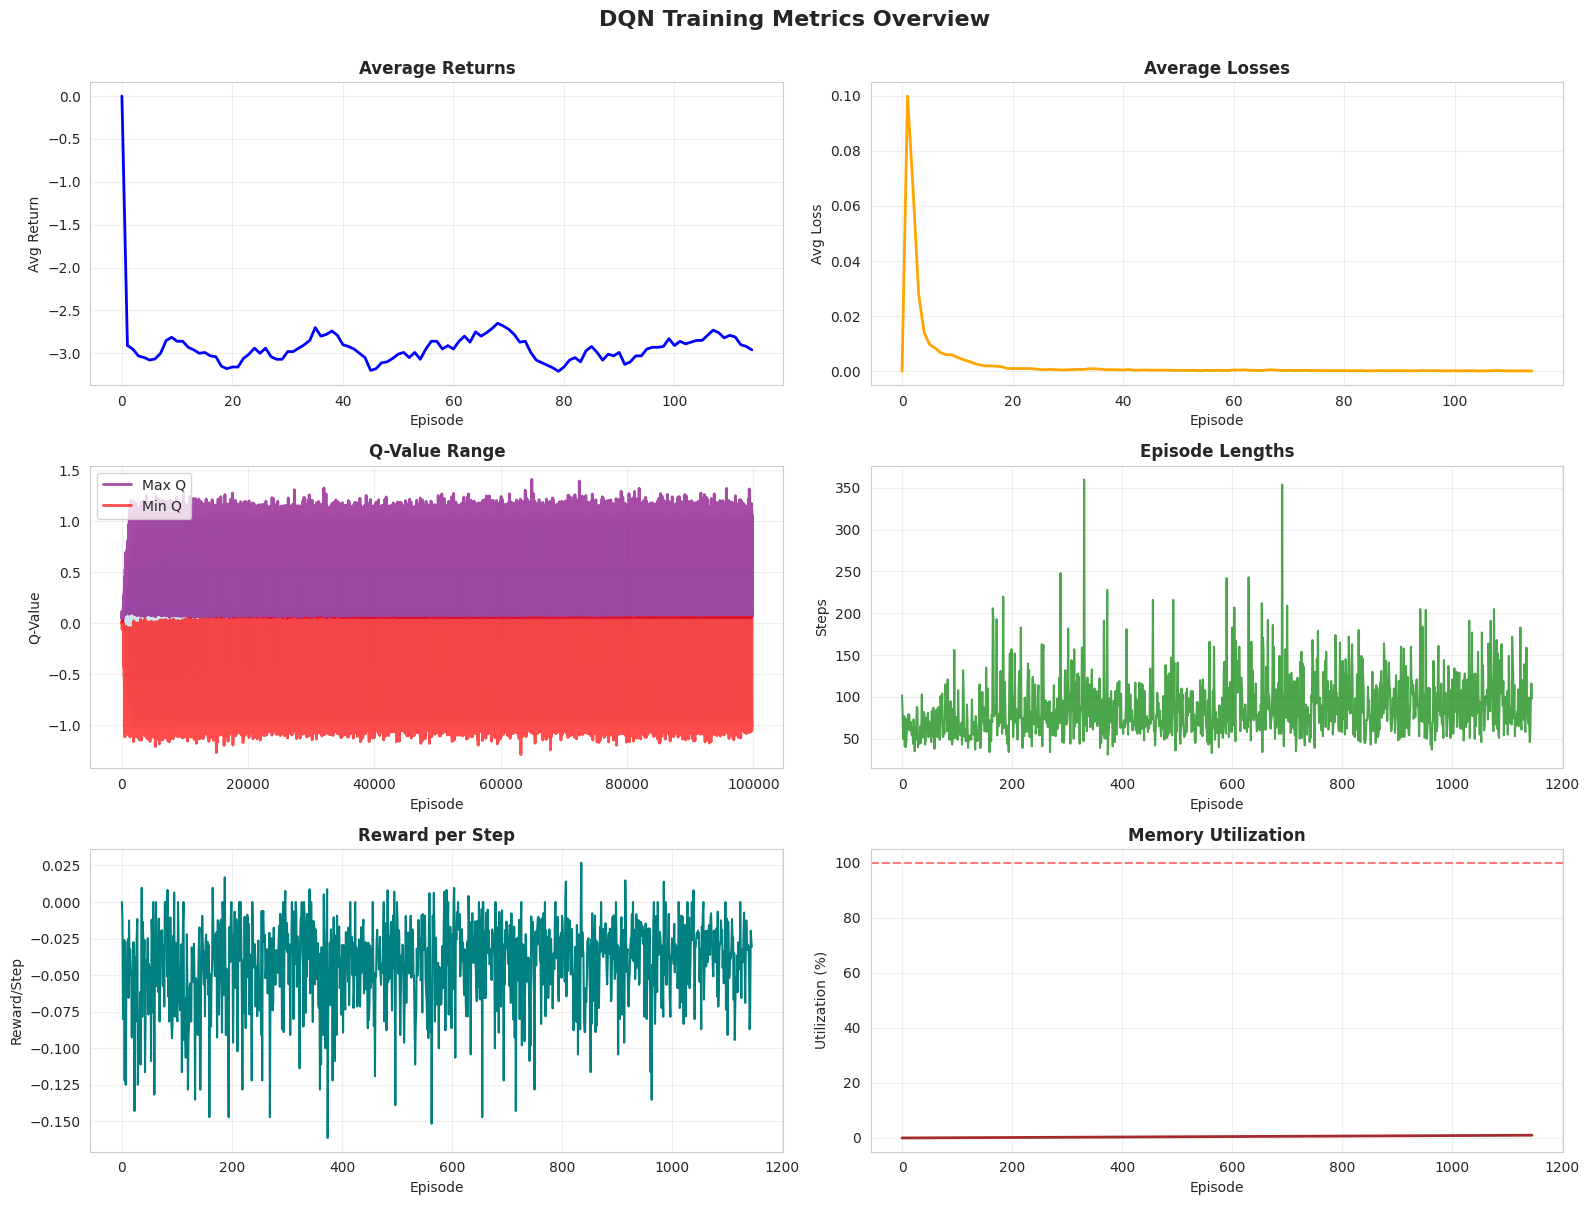

In [25]:
# Multi-metric Overview Panel
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Row 1: Performance Metrics
axes[0, 0].plot(stats['AvgReturns'], linewidth=2, color='blue')
axes[0, 0].set_title('Average Returns', fontweight='bold')
axes[0, 0].set_xlabel('Episode')
axes[0, 0].set_ylabel('Avg Return')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(stats['AvgLosses'], linewidth=2, color='orange')
axes[0, 1].set_title('Average Losses', fontweight='bold')
axes[0, 1].set_xlabel('Episode')
axes[0, 1].set_ylabel('Avg Loss')
axes[0, 1].grid(True, alpha=0.3)

# Row 2: Q-Value Range
axes[1, 0].plot(stats['Max_Q'], linewidth=2, color='purple', alpha=0.7, label='Max Q')
axes[1, 0].plot(stats['Min_Q'], linewidth=2, color='red', alpha=0.7, label='Min Q')
axes[1, 0].fill_between(range(len(stats['Max_Q'])), stats['Min_Q'], stats['Max_Q'], alpha=0.2)
axes[1, 0].set_title('Q-Value Range', fontweight='bold')
axes[1, 0].set_xlabel('Episode')
axes[1, 0].set_ylabel('Q-Value')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(stats['Episode_Lengths'], linewidth=1.5, color='green', alpha=0.7)
axes[1, 1].set_title('Episode Lengths', fontweight='bold')
axes[1, 1].set_xlabel('Episode')
axes[1, 1].set_ylabel('Steps')
axes[1, 1].grid(True, alpha=0.3)

# Row 3: System Metrics
axes[2, 0].plot(stats['Reward_Per_Step'], linewidth=1.5, color='teal')
axes[2, 0].set_title('Reward per Step', fontweight='bold')
axes[2, 0].set_xlabel('Episode')
axes[2, 0].set_ylabel('Reward/Step')
axes[2, 0].grid(True, alpha=0.3)

axes[2, 1].plot(stats['Memory_Utilization'], linewidth=2, color='brown')
axes[2, 1].axhline(y=100, color='r', linestyle='--', alpha=0.5)
axes[2, 1].set_title('Memory Utilization', fontweight='bold')
axes[2, 1].set_xlabel('Episode')
axes[2, 1].set_ylabel('Utilization (%)')
axes[2, 1].grid(True, alpha=0.3)

plt.suptitle('DQN Training Metrics Overview', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

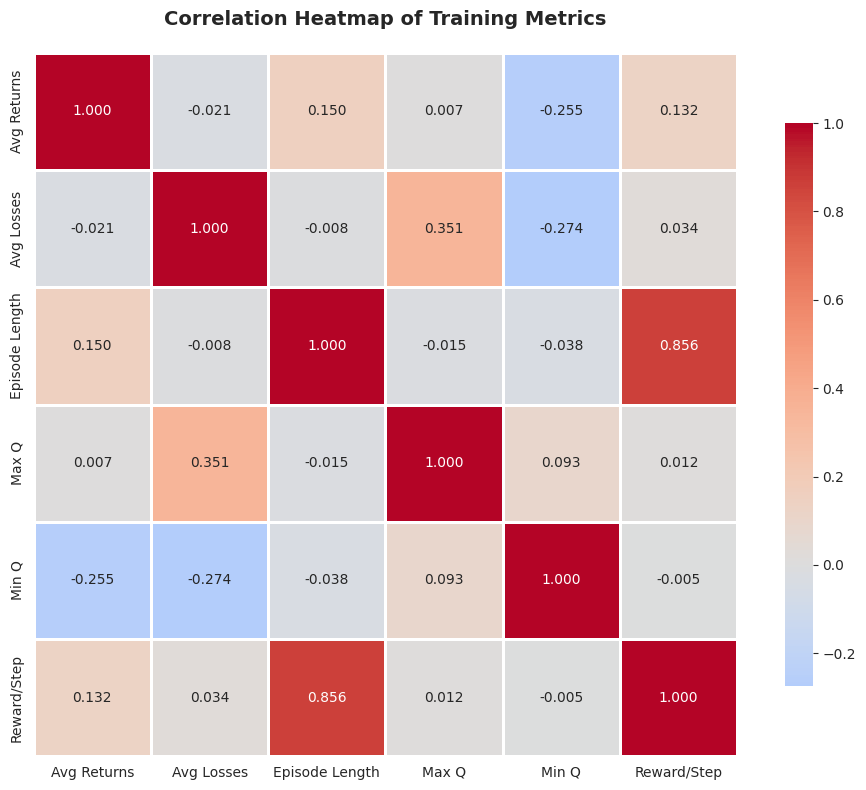

In [27]:
# Correlation Heatmap between metrics
# Create a subset of metrics for correlation analysis
import pandas as pd

# Find the minimum length to ensure all arrays are the same size
min_length = min(len(stats['AvgReturns']), len(stats['AvgLosses']), 
                 len(stats['Episode_Lengths']), len(stats['Max_Q']), 
                 len(stats['Min_Q']), len(stats['Reward_Per_Step']))

metrics_dict = {
    'Avg Returns': stats['AvgReturns'][:min_length],
    'Avg Losses': stats['AvgLosses'][:min_length],
    'Episode Length': stats['Episode_Lengths'][:min_length],
    'Max Q': stats['Max_Q'][:min_length],
    'Min Q': stats['Min_Q'][:min_length],
    'Reward/Step': stats['Reward_Per_Step'][:min_length]
}

# Create correlation matrix
df_metrics = pd.DataFrame(metrics_dict)
correlation_matrix = df_metrics.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Training Metrics', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

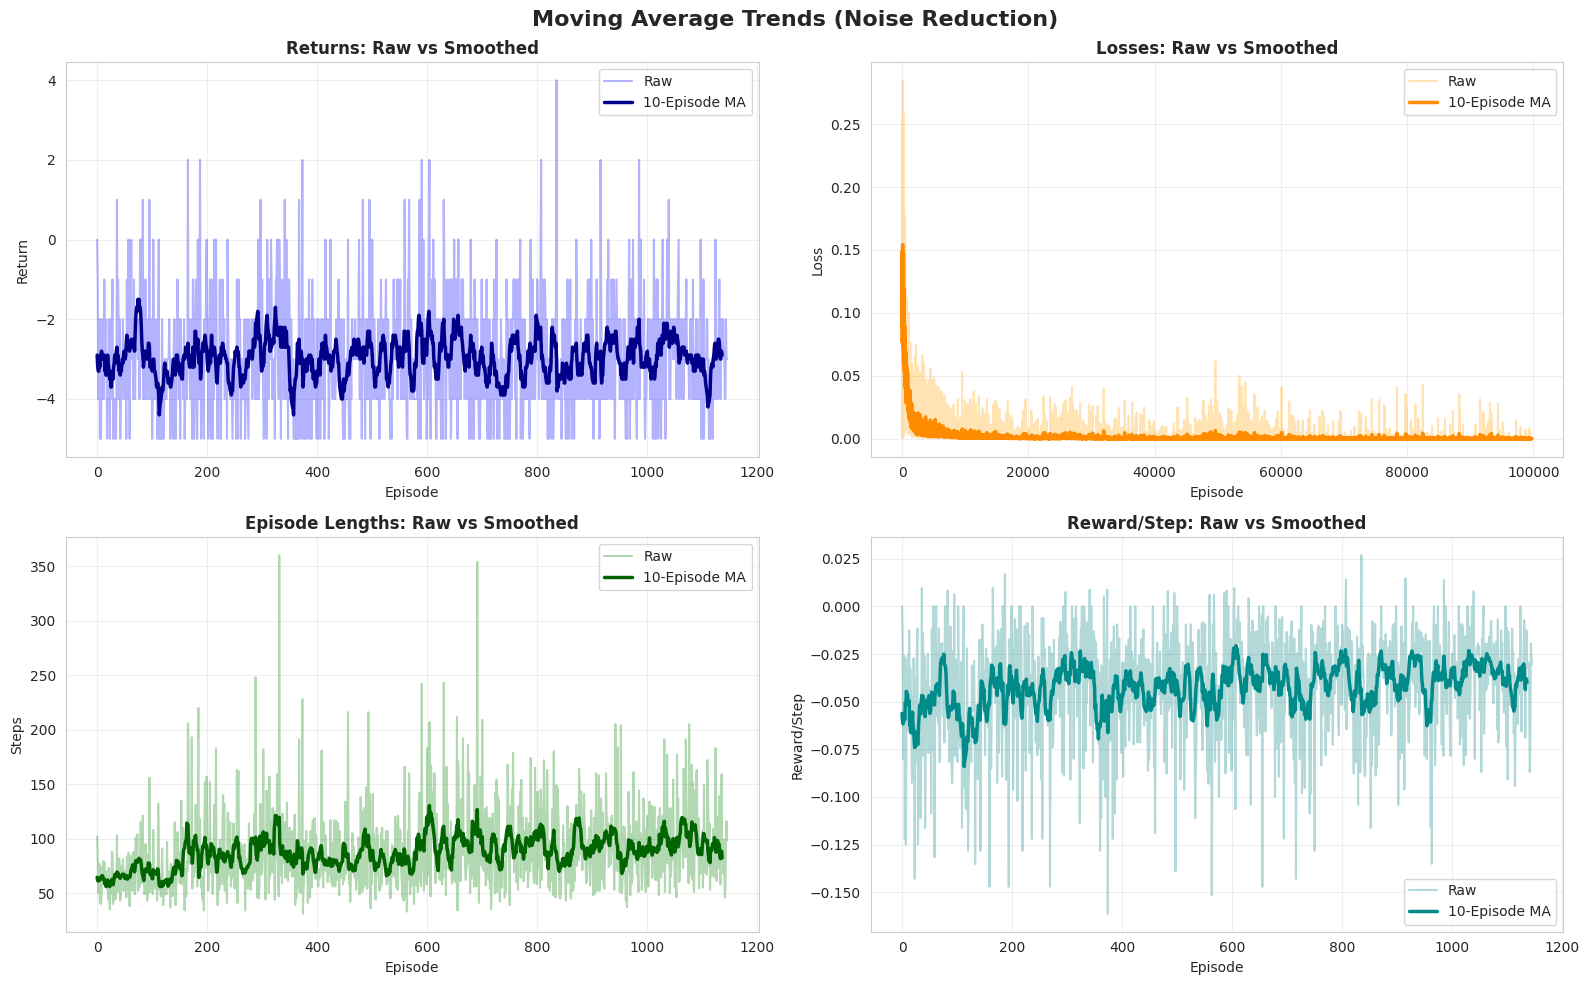

In [28]:
# Moving Average Analysis (Smoothed Trends)
def moving_average(data, window_size=10):
    """Calculate moving average with given window size"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window = 10

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Smoothed Returns
axes[0, 0].plot(stats['Returns'], alpha=0.3, label='Raw', color='blue')
axes[0, 0].plot(moving_average(stats['Returns'], window), linewidth=2.5, 
                label=f'{window}-Episode MA', color='darkblue')
axes[0, 0].set_title('Returns: Raw vs Smoothed', fontweight='bold')
axes[0, 0].set_xlabel('Episode')
axes[0, 0].set_ylabel('Return')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Smoothed Losses
axes[0, 1].plot(stats['Losses'], alpha=0.3, label='Raw', color='orange')
axes[0, 1].plot(moving_average(stats['Losses'], window), linewidth=2.5, 
                label=f'{window}-Episode MA', color='darkorange')
axes[0, 1].set_title('Losses: Raw vs Smoothed', fontweight='bold')
axes[0, 1].set_xlabel('Episode')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Smoothed Episode Lengths
axes[1, 0].plot(stats['Episode_Lengths'], alpha=0.3, label='Raw', color='green')
axes[1, 0].plot(moving_average(stats['Episode_Lengths'], window), linewidth=2.5, 
                label=f'{window}-Episode MA', color='darkgreen')
axes[1, 0].set_title('Episode Lengths: Raw vs Smoothed', fontweight='bold')
axes[1, 0].set_xlabel('Episode')
axes[1, 0].set_ylabel('Steps')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Smoothed Reward per Step
axes[1, 1].plot(stats['Reward_Per_Step'], alpha=0.3, label='Raw', color='teal')
axes[1, 1].plot(moving_average(stats['Reward_Per_Step'], window), linewidth=2.5, 
                label=f'{window}-Episode MA', color='darkcyan')
axes[1, 1].set_title('Reward/Step: Raw vs Smoothed', fontweight='bold')
axes[1, 1].set_xlabel('Episode')
axes[1, 1].set_ylabel('Reward/Step')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Moving Average Trends (Noise Reduction)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [30]:
# Summary Statistics
print("=" * 60)
print("DQN TRAINING SUMMARY STATISTICS")
print("=" * 60)
print(f"\n📊 EPISODE STATISTICS:")
print(f"   Total Episodes: {len(stats['Returns'])}")

# Handle Total_Frames and Learning_Steps - might be lists or scalars
if isinstance(stats['Total_Frames'], list):
    total_frames = stats['Total_Frames'][-1] if len(stats['Total_Frames']) > 0 else 0
    total_learning_steps = stats['Learning_Steps_Total'][-1] if len(stats['Learning_Steps_Total']) > 0 else 0
else:
    total_frames = stats['Total_Frames']
    total_learning_steps = stats['Learning_Steps_Total']

print(f"   Total Frames Processed: {total_frames:,}")
print(f"   Total Learning Steps: {total_learning_steps:,}")

print(f"\n🎯 RETURNS:")
print(f"   Mean: {np.mean(stats['Returns']):.3f}")
print(f"   Std Dev: {np.std(stats['Returns']):.3f}")
print(f"   Min: {np.min(stats['Returns']):.3f}")
print(f"   Max: {np.max(stats['Returns']):.3f}")
print(f"   Final Avg (last 10 eps): {np.mean(stats['AvgReturns'][-10:]):.3f}")

print(f"\n📉 LOSSES:")
print(f"   Mean: {np.mean(stats['Losses']):.5f}")
print(f"   Std Dev: {np.std(stats['Losses']):.5f}")
print(f"   Min: {np.min(stats['Losses']):.5f}")
print(f"   Max: {np.max(stats['Losses']):.5f}")
print(f"   Final Avg (last 10 eps): {np.mean(stats['AvgLosses'][-10:]):.5f}")

print(f"\n⏱️  EPISODE LENGTHS:")
print(f"   Mean: {np.mean(stats['Episode_Lengths']):.1f} steps")
print(f"   Std Dev: {np.std(stats['Episode_Lengths']):.1f} steps")
print(f"   Min: {np.min(stats['Episode_Lengths'])} steps")
print(f"   Max: {np.max(stats['Episode_Lengths'])} steps")

print(f"\n🎮 Q-VALUES:")
print(f"   Max Q (final): {stats['Max_Q'][-1]:.3f}")
print(f"   Min Q (final): {stats['Min_Q'][-1]:.3f}")
print(f"   Q-Value Range (final): {stats['Max_Q'][-1] - stats['Min_Q'][-1]:.3f}")

print(f"\n💾 MEMORY:")
print(f"   Final Utilization: {stats['Memory_Utilization'][-1]:.1f}%")
mem_full_episodes = np.where(np.array(stats['Memory_Utilization']) >= 99)[0]
if len(mem_full_episodes) > 0:
    print(f"   Episodes to Full Memory: {mem_full_episodes[0]}")
else:
    print(f"   Episodes to Full Memory: Memory never filled")

print(f"\n🏆 PERFORMANCE IMPROVEMENT:")
first_10_avg = np.mean(stats['Returns'][:10])
last_10_avg = np.mean(stats['Returns'][-10:])
improvement = ((last_10_avg - first_10_avg) / abs(first_10_avg)) * 100
print(f"   First 10 Episodes Avg: {first_10_avg:.3f}")
print(f"   Last 10 Episodes Avg: {last_10_avg:.3f}")
print(f"   Improvement: {improvement:+.1f}%")

print("\n" + "=" * 60)

DQN TRAINING SUMMARY STATISTICS

📊 EPISODE STATISTICS:
   Total Episodes: 1146
   Total Frames Processed: 100,087
   Total Learning Steps: 99,768

🎯 RETURNS:
   Mean: -2.955
   Std Dev: 1.426
   Min: -5.000
   Max: 4.000
   Final Avg (last 10 eps): -2.833

📉 LOSSES:
   Mean: 0.00165
   Std Dev: 0.00877
   Min: 0.00000
   Max: 0.28481
   Final Avg (last 10 eps): 0.00017

⏱️  EPISODE LENGTHS:
   Mean: 87.3 steps
   Std Dev: 36.4 steps
   Min: 31 steps
   Max: 360 steps

🎮 Q-VALUES:
   Max Q (final): 0.057
   Min Q (final): -0.963
   Q-Value Range (final): 1.020

💾 MEMORY:
   Final Utilization: 1.0%
   Episodes to Full Memory: Memory never filled

🏆 PERFORMANCE IMPROVEMENT:
   First 10 Episodes Avg: -2.900
   Last 10 Episodes Avg: -2.900
   Improvement: +0.0%

